# Opérateurs pour les champs de vecteurs

<div class='alert alert-info'>
    <p>

- L'objectif de ce TP sera de manipuler les champs de vecteurs via le calcul de flux et de circulation, et d'introduire les opérateurs mathématiques *Divergence*, noté $ div $, et *Rotationnel*, noté $\vec{rot}$.
- Les intégrales multiples seront également réutilisées, cf. TP3 et 4 précédent. </p>
</div>

## 1. Introduction
### 1.1. Définiton opérateurs $div$ etr $\vec{rot}$
**Avant de commencer le TP, il est nécessaire de lire le fichier "Introduction du TP6.pdf".** 
Ci-dessous un résumé des informations essentielles sur les opérateurs mathématiques $div$ etr $\vec{rot}$ :
- l’operateur Divergence s’applique à un champ vectoriel et retourne un champ scalaire. La divergence représente **le flux qui sort (ou entre s’il est négatif) d'un volume infinitésimal construit autour d'un point donné de l'espace, par unité de volume.**
- **Le rotationnel d'un champ en un point M est un vecteur** perpendiculaire à la surface $dS$ définie par le contour fermé élémentaire construit autour de M. En outre, **la norme du rotationnel est la circulation par unité de surface le long de ce contour.**

### 1.2. Calcul symbolique sur Python
Grâce à la librairie ``Sympy`` on peut faire du calcul symbolique. Ainsi on peut exprimer analytiquement la dérivée d'une fonction $f$  par rapport à $x$, $y$ et $z$, cf. exemple ci-dessous :


In [2]:
import sympy as sp # Librarie symbolique

x, y, z = sp.symbols('x y z', real=True)
f = 3*x**2+y*z
diffx = sp.diff(f, x)
diffy = sp.diff(f, y)
diffz = sp.diff(f, z)
print(f' Les dérivées de f(x,y,z) par rapport à x, y et z sont : [{diffx},{diffy},{diffz}]')


 Les dérivées de f(x,y,z) par rapport à x, y et z sont : [6*x,z,y]


## 2. Théorème de Green-Ostrogradsky

### 2.1 Défintion
Le théorème de Green-Ostrogradsky traduit l'égalité entre l'intégrale de la divergence d'un champ vectoriel $\vec{F}$ sur un volume $V$ dans $\mathbb {R} ^{3}$ et le flux de ce champ à travers la frontière $S$ du volume, soit :
$$ \iiint_V div(\vec{F}) dV = \iint_S \vec{F}\cdot \vec{dS}$$

### 2.2. Calcul de $div(\vec{F})$ 
Soit le vecteur $\vec{F}(x,y,z) = \langle 0, y, 0\rangle$. Calculer en symbolique sa divergence en complétant les `??` du code ci-dessous :

In [4]:
import sympy as sp #symbolic library

x, y, z = sp.symbols('x y z', real=True)

# Composantes du champ F
Fx = 0 
Fy = y 
Fz = 0
# Calcul de la divergence
divF = sp.diff(Fx, x) + sp.diff(Fy, y)+ sp.diff(Fz, z)
print(f' div(F) = {divF}')

 div(F) = 1


### 2.3. Calcul du flux de $\vec{F}$

Soit $\Phi$ le flux de $\vec{F}$ sur la sphère de rayon $R  = 2$ dans $\mathbb{R}^3$ centrée en $(0,0,0)$ :
$ \Phi=\iint_S \vec{F}\cdot \vec{dS}$
- Retrouver que dans le repère sphérique $\Phi$ peut s'écrire comme l'intégrale double suivante :

$$ \Phi = \int_{\theta = ?}^? \int_{\varphi = ?}^{?} G(\theta, \varphi)  d \theta d\varphi$$

où $G(\theta, \varphi) $ et les bornes des intégrales sont à déterminer. 
- Compléter les `??` du code suivant pour calculer le flux $\Phi$. Ce code se réfère aux codes déjà utilisés pour intégrer dans les TP3 et 4.


In [8]:
import numpy as np

def calcul_flux(R,Ndphi,Ndth,phimin,phimax,thmin,thmax):
    Flux   = 0
    dphi   = (phimax - phimin) / Ndphi 
    dtheta = (thmax - thmin) / Ndth
    for q in range(int(Ndphi)):
        phi = phimin + q * dphi
        for p in range(int(Ndth)):
            theta = thmin + p * dtheta
            Flux += (R**3*np.sin(theta)**3 * np.sin(phi)**2*dtheta*dphi)
    return(Flux)

Flux = calcul_flux(2, 1e3,1e3,0,2*np.pi,0,np.pi)
print(f'Le flux est égal à {Flux}')

Le flux est égal à 33.51032163833414


### 2.4. Calcul de l'intégrale triple de la divergence

- Pour calculer cette intégrale triple on se placera en coordonnées cartésiennes, soit :

$$ \iiint_V div(\vec{F})dV =  \int_{x = ?}^? \int_{y = ?}^{?} \int_{z = ?}^{?} div(\vec{F}\left(x, y,z\right))dzdydx =  \int_{x = ?}^? \int_{y = ?}^{?} \int_{z = ?}^{?} dzdydx,$$

où $div(\vec{F})=1$, vu précédemment, et où l'on doit correctement définir les bornes d'intégration. Vous pouvez vous inspirer de l'exercice 7.8.

- Soit la fonction $i(x,y,z)$, dont on veut calculer l'intégrale triple. 

$$
 \int_{x = a}^b \int_{y = f(x)}^{g(x)} \int_{z = h(x,y)}^{j(x,y)} i(z,y,x) dz dy dx
$$

Sous python on peut utiliser la commande ``tplquad`` pour calculer cette intégrale :

```Python
result, error = tplquad(i(z,y,x),a,b,f,g,h,j)
```

où :
- le premier argument est l'intégrand (une fonction)
- les deuxième/troisième sont les limites de l'intégrale externe
- les quatrième/cinquième sont les limites de l'intégrale du milieu, pour vous des fonctions
- les sixième et septième sont les limites de l'intégrale intérieure, pour vous des fonctions 

Compléter le code suivant pour résoudre l'intégrale triple de la divergence de $\vec{F}$.

In [11]:
from scipy.integrate import tplquad 


def ymin(x):
    return -np.sqrt(R**2 - x**2)

def ymax(x):
    return np.sqrt(R**2 - x**2)

def zmin(x,y):
    return -np.sqrt(R**2 - x**2 - y**2)

def zmax(x,y):
    return np.sqrt(R**2 - x**2 - y**2)

def divF(x,y,z):
    return 1

R = 2
def calcul_I(divF):
    I, error = tplquad(divF, -R, R, ymin, ymax, zmin, zmax)
    return I

Itriple = calcul_I(divF)
print(f"L'integrale triple de la divergence est égal à {Itriple}")

L'integrale triple de la divergence est égal à 33.510321638291174


### 2.5. Calcul analytique 
Calculer analytiquement l'intégrale de $div(\vec{F})$ sur le volume de la sphère. Comparer avec votre résultat numérique. Que remarquez-vous ? 

In [13]:
print(f"Le flux est égal à {Flux} et l'intégrale triple de la divergence est égal à {Itriple}.")
print(f"{4/3 * np.pi * R**3} est égal à {Flux} et {Itriple}.")

Le flux est égal à 33.51032163833414 et l'intégrale triple de la divergence est égal à 33.510321638291174.
33.510321638291124 est égal à 33.51032163833414 et 33.510321638291174.


### 2.6. Vérification du théorème de Green-Ostrogradsky
Comparez le flux de $\Phi$ de $\vec{F}$ et l'intégrale triple de la divergence de $\vec{F}$. Le thèorème est validé ?

In [12]:
print(f"Erreur : {Itriple-Flux}")

Erreur : -4.296651923141326e-11


### 2.7. Et la physique dans tout ça ? 

Le théorème de Gauss, très utile en électromagnétisme, est issu du théoreme de la divergence et de l'équation de Maxwell-Gauss qui dit qu'en tout point, $div(\vec{E})=\frac{\rho}{\varepsilon}$ avec $\vec{E}$ le champ électrique, $\rho$ la densité volumique de charge et $\varepsilon$ la permittivité du milieu. Ainsi, dans des cas simples où la répartition spatiale des charges le permet,  on peut calculer le champ électrique $\vec{E}$ créé par cette dernière. 

L'exemple précédent correspond ainsi au champ créé à l'intérieur d'une plaque chargée de longueur et largeur infinie dans les directions Ox et Oz, d'épaisseur $a$ dans la direction Oy, et symétrique par rapport au plan xOy. En outre, dans cette plaque, la densité volumique de charge est constante. Ainsi, d'après Maxwell-Gauss, $div(\vec{E})$ est bien constant, et l'on pourrait démontrer via le théorème de Gauss que le champ est alors proportionnel à y.


## 3. Théorème de Stokes

On va essayer maintenant de retrouver numériquement le théorème de Stokes qui lie pour un champ $\vec{F}$ le flux du rotationnel $\vec{rot}(\vec{F})$ à la circulation de $\vec{F}$ par : 
$$ \iint_S \vec{rot}(\vec{F})\cdot \vec{n} dS = \int_C \vec{F} \cdot \vec{dl}$$
pour une surface donnée $S$ orientée positivement par rapport au sens de circulation le long d'un contour fermé $C$ délimitant cette surface.


### 3.1. Calcule de $\vec{rot}(\vec{F})$. 

Soit le champ de vecteur $\vec{F}(x,y,z) = \langle -y, x, 0\rangle$ sur un disque de rayon $R$ dans le plan (xOy).

Comme précedemment, en utilisant la librairie ``Sympy`` pour du calcul symbolique, ainsi que le commande ``diff`` pour calculer les dérivées, calculer analytiquement $\vec{rot}(\vec{F})$.


In [15]:
x, y, z = sp.symbols('x y z', real=True)

# Composantes de F
F1 = -y
F2 = x
F3 = 0
# Calcul du rotationnel
rotF=[sp.diff(F3, y)-sp.diff(F2, z), sp.diff(F1, z)-sp.diff(F3, x), -sp.diff(F1, y)+sp.diff(F2, x)]
print(f' rot(F) = {rotF}')

 rot(F) = [0, 0, 2]


### 3.2. Représentation $\vec{F}$ et $\vec{rot}(\vec{F})$ dans un repère 3D. 
Il faut s'inspirer du formalisme utilisé au TP5. Le code est donnée pour représenter le champ $\vec{F}$. Remplacer les `??` pour le rotationnel.

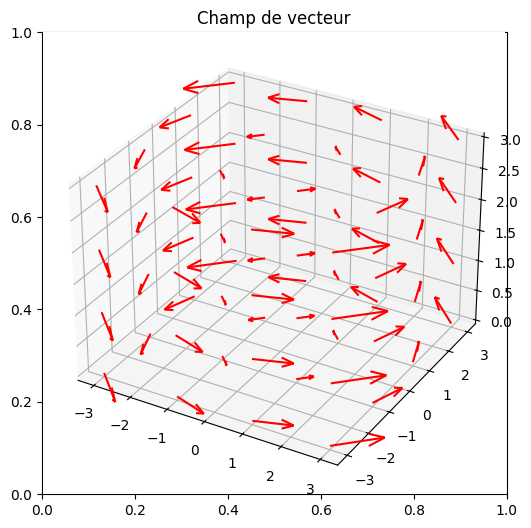

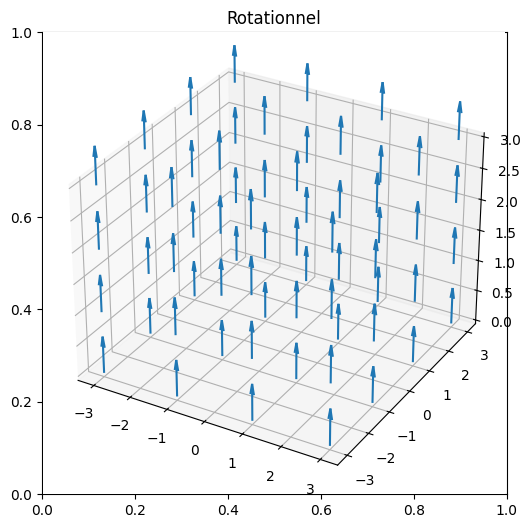

In [18]:
import matplotlib.pyplot as plt

x       = np.linspace(-3, 3, 4)
y       = np.linspace(-3, 3, 4)
z       = np.linspace(0, 3, 4)
X, Y, Z = np.meshgrid(x,y,z)

# Champ F
u1 = -Y
v1 = X
w1 = 0

# Rotationnel de F
u2 = rotF[0]
v2 = rotF[1]
w2 = rotF[2]

fig1, ax = plt.subplots(1,1,figsize=(6,6)) 
ax = fig1.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, u1, v1, w1, color='r', length=0.3 )
plt.title('Champ de vecteur')

fig2, ax = plt.subplots(1,1,figsize=(6,6)) 
ax = fig2.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z,u2, v2, w2, length=0.3 )
plt.title('Rotationnel')
plt.show()

**Remarque :** Le champ $  \vec{F} $ tourne autour de l'axe Oz. D'un point de vue physique, il peut representer la vitesse du vent dans un tourbillon, avec une vitesse qui augmente (en norme) quand on s'éloigne de l'axe. La norme de son rotationnel est constant, de même que sa direction qui est celle de l'axe de rotation (ici l'axe Oz). Plus la vitesse augmente rapidement lorsque on s'éloigne du centre, et plus la norme du rotationnel sera grande.



### 3.3. Calcul du flux du rotationnel 
On va calculer le flux $\Phi_{rot}$ de rotationnel de $\vec{F}$ sur le disque de rayon $R = 3$ et centre $(0,0,0)$ dans le plan xOy : 
$ \Phi_{rot} = \iint_S \vec{rot}(\vec{F}) \cdot \vec{dS}$ 

- Retrouver que dans le repère polaires (ou cylindriques)  $\Phi_{rot}$ peut s'écrire comme l'intégrale double suivante :
$$ \Phi_{rot} = \int_{\theta = ?}^? \int_{r = ?}^{?} G(r, \theta)  d r d \theta
$$ où $G(r, \theta)$ et les bornes des intégrales sont à déterminer. 
- Compléter les `??` du code suivant pour calculer le flux $\Phi_{rot}$. 

In [20]:
def calcul_flux(Ndr,Ndth,rmin,rmax,thmin,thmax):
    Flux = 0
    dr   = (rmax-rmin )/ Ndr
    dtheta = (thmax-thmin) / Ndth
    for q in range(int(Ndr)):
        r = rmin + q * dr
        for p in range(int(Ndth)):
            theta = thmin + p * dtheta
            Flux += (2 * r * dr * dtheta)
    return Flux

Flux = calcul_flux(1e3,1e3,0,3,0,2*np.pi)
print(f'Le flux est égal à {Flux}')

Le flux est égal à 56.49211909683934


### 3.4. Calcul de la circulation de $\vec{F}$
En utilisant la paramétrisation du cercle bordant le disque, la circulation de $\vec{F}$ en coordonnées cylindriques se réécrit :
$$ \int_C \vec{F}\cdot \vec{dl} = \int_{\theta = ?}^{?} h(\theta) d\theta $$
où $h$ est l'intégrand obtenu, et les bornes de l'intégrale est à déterminer. 

- Soit $f(x)$ la fonction dont on veut calculer l'intégrale :
$$
 \int_{x = a}^b f(x) dx
$$
On peut utiliser sous Pyhton la commande ``quad`` (quadrature) pour calculer cette intégrale :

```Python
result, error = quad(f, a, b)
```

où :
- le premier argument de la fonction ``quad`` est l'intégrand
- le second et troisième argument sont les bornes d'intégration 

Compléter le code suivant pour résoudre l'intégrale.

In [23]:
from scipy.integrate import quad

def h(theta):
    return R**2
R=3
circulation, error_circ = quad(h, 0, 2*np.pi)
print(f'La circulation avec quad = {circulation}')

La circulation avec quad = 56.548667764616276


### 3.5. Observation 
 Calculer analytiquement la circulation. Commentaires sur la valeur trouvée.

### 3.6. Vérification du théorème de Stokes
Comparer le flux $\phi_{rot}=\vec{rot}(\vec{F})$ du rotationnel de $\vec F$ et sa circulation. Conclusions ?

### 3.7. Et la physique dans tout ça ? 

Le théorème d'Ampère, très utile en électromagnétisme, est issu du théoreme de Stokes et de l'équation de Maxwell-Faraday qui dit qu'en tout point, $\vec{rot}(\vec{B})=\mu_0 \vec{j}$ avec $\vec{B}$ le champ magnétique, $\vec{j}$  la densité volumique de courant et $\mu_0$ la perméabilité du milieu. Ainsi, dans des cas simples, lorsque la répartition spatiale de la densité volumique de courant le permet, on peut calculer ce champ $\vec{B}$ créé par cette dernière. 

L'exemple précédent correspond ainsi au champ créé à l'intérieur d'un fil cylindrique infini d'axe Oz parcouru par une densité volumique de courant $\vec{j}$ uniforme. Ainsi, d'apres Maxwell-Gauss, $\vec{rot}(\vec{B})$ est bien constant, et l'on pourrait démontrer via le théorème d'Ampère que le champ $\vec{B}$ créé dans le fil tourne autour de l'axe et augmente avec la distance à l'axe.
